<a id=contents></a>

# Model building

In this notebook I'm loading up the BERTopic model that I had trained on GoogleColab, merging the results of the model with the rest of the data and exploring the results. 


[1. Loading up the training data and model](#one1)

[2. Exploring and reducing the topics](#two)

[3. Linkages in Topics](#three)

[4. Our main topics over time](#four)

[5. Sentiment over time](#five)

[6. Conclusions and model comparison table](#conc)

<a id=one1></a>

## 1. Load up training data and model

[LINK to table of contents](#contents)

In [95]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from scipy.stats import hmean
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pickle, io
from pathlib import Path

viz_path = Path('data/viz/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
print('Loading up docs')
filepath = 'data/clean/features/text_for_topics_post_Aug22.csv'
docs = pd.read_csv(filepath, index_col='tweet_id')

#meta data getting loaded too
filepath = 'data/clean/dashboard_data.csv'
df = pd.read_csv(filepath, index_col='tweet_id').drop(columns=['Unnamed: 0', 'clean_tweet_text'],)
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.join(docs, how='right')
df.info()

Loading up docs
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12037 entries, 1580168615357140992 to 1565189065158311937
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   Unnamed: 0.2                 12037 non-null  int64              
 1   Unnamed: 0.1                 12037 non-null  int64              
 2   datetime                     12037 non-null  datetime64[ns, UTC]
 3   display_name                 12037 non-null  object             
 4   tweet_text                   12037 non-null  object             
 5   User_id                      12037 non-null  float64            
 6   #likes                       12037 non-null  float64            
 7   #retweets                    12037 non-null  float64            
 8   #responses                   12037 non-null  float64            
 9   language                     12037 non-null  object             
 10

 Unfortunately I am still experiencing errors with the loading of the model there are some issues logged with the way that Bertopic models are saved at the moment and I hope to be able to load up the model. However, you can reproduce the model entirely on GoogleColab using the colab notebook in this repo.
 I have downloaded however all the other necessary data for exploring the model results. 

In [ ]:
# topic_model = joblib.load('models/topic/BertTopic/topic_model_final.pkl', 'r+')

<a id=two></a>

## 2. Exploring and reducing topics

[LINK to table of contents](#contents)

<a id=three></a>

## 3. Linkages in topics

[LINK to table of contents](#contents)

<a id=four></a>

## 4. Our main topics over time

[LINK to table of contents](#contents)

<a id=five></a>

## 5. Sentiment over time

[LINK to table of contents](#contents)

On GoogleColab, I had also used a pre-trained [sentiment_classifier](https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english) from BERT in order to infer the sentiment of the tweets collected. Let's explore how sentiment varies across the other dimensions of our dataset. 

In [4]:
sent = pd.read_csv('data/preds/text_and_sentiment_preds.csv', index_col='tweet_id')
sent = sent.join(df[['datetime', 'By_or_at_Musk', 'language', '#likes', '#retweets', '#responses','display_name']])
# dropping non-english tweets
sent = sent.loc[sent.language=='en']
sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11914 entries, 1580168615357140992 to 1565189065158311937
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   clean_tweet_text      11914 non-null  object             
 1   Pred_sentiment_out    11914 non-null  object             
 2   Pred_sentiment_score  11914 non-null  float64            
 3   datetime              11914 non-null  datetime64[ns, UTC]
 4   By_or_at_Musk         11914 non-null  object             
 5   language              11914 non-null  object             
 6   #likes                11914 non-null  float64            
 7   #retweets             11914 non-null  float64            
 8   #responses            11914 non-null  float64            
 9   display_name          11914 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 1023.9+ KB


In [41]:
sent_agg.head(20)

,datetime,By_or_at_Musk,Pred_sentiment_out,value,value%
0,2022-09-01 00:00:00+00:00,By @elonmusk,POSITIVE,3,100.000000
1,2022-09-01 00:00:00+00:00,Mentions @elonmusk,NEGATIVE,44,65.671642
2,2022-09-01 00:00:00+00:00,Mentions @elonmusk,POSITIVE,23,34.328358
3,2022-09-02 00:00:00+00:00,Mentions @elonmusk,NEGATIVE,25,71.428571
4,2022-09-02 00:00:00+00:00,Mentions @elonmusk,POSITIVE,10,28.571429
5,2022-09-03 00:00:00+00:00,Mentions @elonmusk,NEGATIVE,43,58.904110
6,2022-09-03 00:00:00+00:00,Mentions @elonmusk,POSITIVE,30,41.095890
7,2022-09-04 00:00:00+00:00,By @elonmusk,NEGATIVE,1,33.333333
8,2022-09-04 00:00:00+00:00,By @elonmusk,POSITIVE,2,66.666667
9,2022-09-04 00:00:00+00:00,Mentions @elonmusk,NEGATIVE,33,47.142857


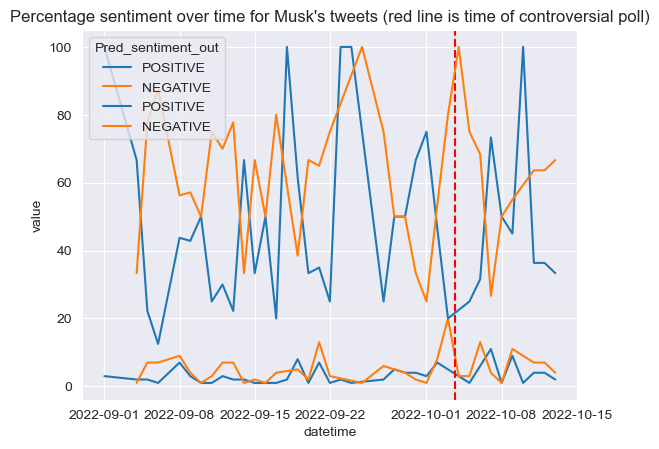

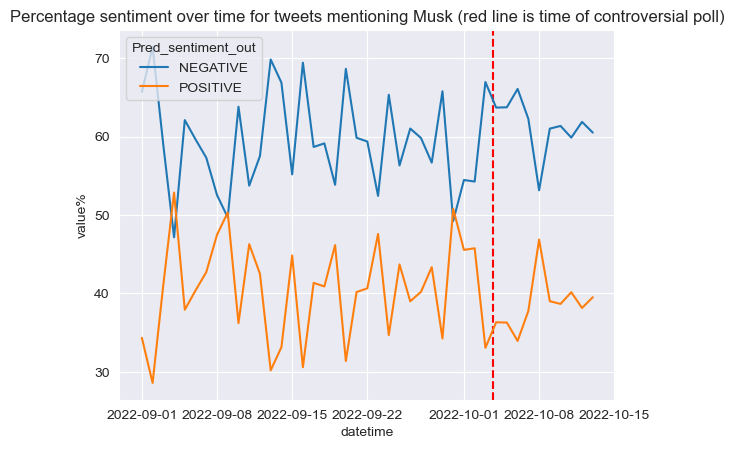

In [39]:
sent_agg = sent[['datetime', 'By_or_at_Musk', 'Pred_sentiment_out']].groupby([pd.Grouper(key='datetime', freq='4H'), 
                        'By_or_at_Musk', 'Pred_sentiment_out']).size().reset_index().rename({0:'value'}, axis=1)

sent_agg['value%'] = 100*sent_agg['value'] / sent_agg.groupby([
                        pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk',])['value'].transform('sum')

sent_agg.to_csv(str(viz_path/'sent_agg_simple_4H.csv'))

sent_agg = sent[['datetime', 'By_or_at_Musk', 'Pred_sentiment_out']].groupby([pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk', 'Pred_sentiment_out']).size().reset_index().rename({0:'value'}, axis=1)

sent_agg['value%'] = 100*sent_agg['value'] / sent_agg.groupby([
                        pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk',])['value'].transform('sum')

sent_agg.to_csv(str(viz_path/'sent_agg_simple_D.csv'))

cutoff_date = pd.to_datetime('2022-10-03 16:15:43+00:00')

sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='By @elonmusk'], x ='datetime', y='value', hue='Pred_sentiment_out')
plt.title('Percentage sentiment over time for Musk\'s tweets (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='By @elonmusk'], x ='datetime', y='value%', hue='Pred_sentiment_out')
plt.show()
###########
plt.title('Percentage sentiment over time for tweets mentioning Musk (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='Mentions @elonmusk'], x ='datetime', y='value%', hue='Pred_sentiment_out')
plt.show()                        


Hmm, there doesn't appear to be much of a trend here in anyway (it may come out with better viz in ggplot later). If we take sentiment predictions at face value, it appears that the general sentiment of tweets mentioning Musk are generally more negative than positive. The period immediately after Musk's poll doesn't buck this trend in any way. 

Let's filter for only those tweets where the sentiment classifier was extremely certain of the sentiment, i.e. >= 99% .


In [55]:
sent_90

,datetime,By_or_at_Musk,Pred_sentiment_out,Pred_sentiment_score,High_score_pred
tweet_id,,,,,
1580168615357140992,2022-10-12 12:08:50+00:00,Mentions @elonmusk,NEGATIVE,0.999048,NEGATIVE
1580013582778974208,2022-10-12 01:52:48+00:00,Mentions @elonmusk,NEGATIVE,0.981824,NEUTRAL
1579994233699565568,2022-10-12 00:35:54+00:00,Mentions @elonmusk,POSITIVE,0.870220,NEUTRAL
1579976175732281344,2022-10-11 23:24:09+00:00,Mentions @elonmusk,NEGATIVE,0.991798,NEGATIVE
1579963541414903815,2022-10-11 22:33:57+00:00,Mentions @elonmusk,NEGATIVE,0.999307,NEGATIVE
...,...,...,...,...,...
1566233616543125505,2022-09-04 01:16:08+00:00,By @elonmusk,POSITIVE,0.999815,POSITIVE
1566233000458592256,2022-09-04 01:13:41+00:00,By @elonmusk,NEGATIVE,0.860174,NEUTRAL
1565441825376243713,2022-09-01 20:49:50+00:00,By @elonmusk,POSITIVE,0.999671,POSITIVE


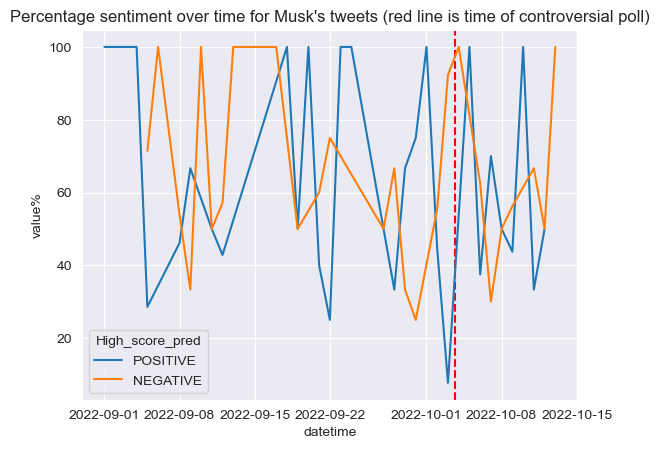

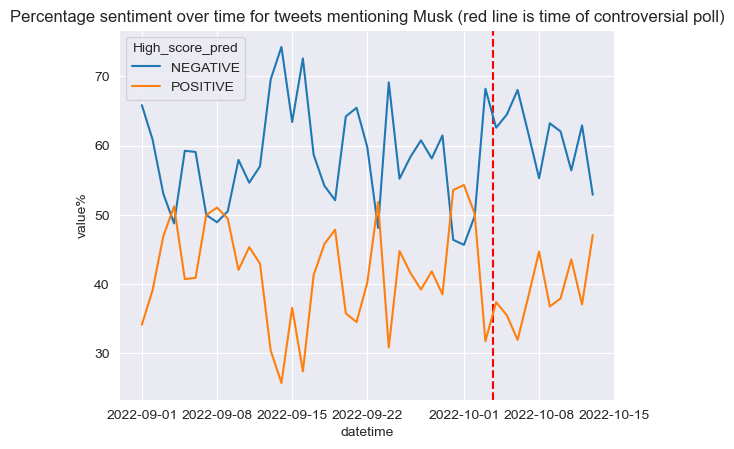

In [57]:
sent_90 = sent[['datetime', 'By_or_at_Musk', 'Pred_sentiment_out', 'Pred_sentiment_score']].copy()
sent_90['High_score_pred'] = 'NEUTRAL'
sent_90.loc[sent_90.Pred_sentiment_score>=0.99, 'High_score_pred'] = sent_90['Pred_sentiment_out']
sent_90 = sent_90.loc[sent_90.High_score_pred!='NEUTRAL']

sent_agg = sent_90[['datetime', 'By_or_at_Musk', 'High_score_pred']].groupby([pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk', 'High_score_pred']).size().reset_index().rename({0:'value'}, axis=1)

sent_agg['value%'] = 100*sent_agg['value'] / sent_agg.groupby([
                        pd.Grouper(key='datetime', freq='D'), 
                        'By_or_at_Musk',])['value'].transform('sum')
# sent_agg
sent_agg.to_csv(str(viz_path/'sent_agg_simple_D_over_99.csv'))

plt.title('Percentage sentiment over time for Musk\'s tweets (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='By @elonmusk'], x ='datetime', y='value%', hue='High_score_pred')
plt.show()
###########
plt.title('Percentage sentiment over time for tweets mentioning Musk (red line is time of controversial poll)')
plt.axvline(cutoff_date,0, sent_agg.value.max(), linestyle='dashed', color='red')
sns.lineplot(data=sent_agg.loc[sent_agg.By_or_at_Musk=='Mentions @elonmusk'], x ='datetime', y='value%', hue='High_score_pred')
plt.show()          

There is arguably a small increase in the ratio of negative to positive tweets for those mentioning Musk, but not an immense jump, and the numbers seem to recover not long after. It is also important to remember that we are not able here to capture negative sentiment *towards* Elon Musk - only in connection to him (and even that, somewhat tangentially). It's perfectly possible that someone would have generated a very negative tweet where they are complaining about petroleum-based cars (for instance) and where they tag Elon Musk - which, realistically, translates into a positive sentment towards Musk, given that he's head of Tesla. 

Let's take a look at how this varies when we mix topics in as well. 
We'll need to get all the tweets we have assigned topics to using BERTopic, select the most likely one 

In [108]:
topic_labels = {
    1:'Russia_Ukraine_and_war',
    2:'Twitter_bots',
    5:'Starlink_and_satellites',
    6:'SpaceX',
    11:'Robots_and_AI',
  }

In [135]:
topics = pd.read_csv('data/preds/text_topic_probs_redux.csv', index_col='tweet_id')
topics.insert(0, 'Main_topic' , topics[topics.columns[:-1]].apply(lambda x: x.argmax(), axis=1))
topics['Main_topic'].replace(topic_labels, inplace=True)
topics.head()

,Main_topic,0,1,2,3,4,5,6,7,8,...,69,70,71,72,73,74,75,76,77,clean_tweet_text
tweet_id,,,,,,,,,,,,,,,,,,,,,
1580168615357140992,0,1.000000,8.298923e-307,7.616580e-307,2.038300e-307,3.227613e-307,4.680169e-307,5.407762e-307,3.243999e-307,7.597482e-307,...,4.358597e-307,1.904953e-307,2.424376e-307,1.860363e-307,4.161548e-307,2.612142e-307,2.279323e-307,2.669250e-307,2.154047e-307,My favorite least favorite is ONLY TWO IDEAS
1580013582778974208,0,0.265244,1.166869e-02,9.759405e-03,2.714440e-03,2.978305e-03,5.367448e-03,5.956865e-03,3.633807e-03,8.282313e-03,...,5.023313e-03,2.180062e-03,2.966637e-03,2.100634e-03,4.724942e-03,4.118049e-03,2.455282e-03,3.163200e-03,2.342698e-03,My first day back to twit after a bit youre goin toe to toe w me man u smelled the fear huh Lol😘
1579994233699565568,0,0.155546,1.081946e-02,1.073696e-02,3.458320e-03,3.079629e-03,4.491499e-03,4.869585e-03,3.182556e-03,5.963418e-03,...,2.728176e-03,1.708569e-03,2.599438e-03,1.631450e-03,2.504219e-03,4.552303e-03,1.690918e-03,2.153339e-03,1.579499e-03,Bremmers a straight shooter I dont see him inventing and PRINTING something attributing it to Musk
1579976175732281344,0,0.178175,1.168058e-02,9.382016e-03,2.652212e-03,3.456878e-03,5.746364e-03,6.351354e-03,2.821025e-03,7.522751e-03,...,4.476122e-03,2.157688e-03,2.740427e-03,2.010582e-03,4.281461e-03,4.008176e-03,2.214602e-03,2.531410e-03,2.028530e-03,lollll ‘Musk by MuskIt was alway rite there
1579963541414903815,0,0.387081,2.430777e-02,1.972092e-02,5.567648e-03,4.101697e-03,8.698562e-03,9.409069e-03,5.573041e-03,1.245387e-02,...,6.536267e-03,3.582153e-03,5.552579e-03,3.398810e-03,5.630716e-03,1.606638e-02,3.653734e-03,4.966527e-03,3.424375e-03,Yup Maybe Bremmer betrayed a confidence


In [136]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='Russia_Ukraine_and_war']['clean_tweet_text'].head(4)

tweet_id
1577086092930469890    Another way to say that would be While I appreciate Musks armslength interest in saving lives the suggestion of a deal is moot Putin holds the cards  has no interest in a deal and Ukraine is a sovereign nation with a RIGHT to fight for their land against ANY odds1
1577065939442446336    If a brokered peace is inevitable then getting there sooner saves lives Thats serious like a heart attack and I appreciate the train of thought But I hear the cold water truth you lay out that that is not at all currently possible I paraphrase so pls correct 😔    
1577059935413600257    Current Western characterizations of Putin may indeed be accurate and youre the expert so I believe they are I broached the topic because HISTORICALLY western characterizations have been sometimes intentionally ‘skewed                                              
1576994036581224448    I big issue currently is US love them underdogs sentiment tracks Ukraine bot goals so                   

In [137]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='Starlink_and_satellites']['clean_tweet_text'].head(4)

tweet_id
1578617929901707265    This is how Starlink started 😄🙌✨So wild  You got it done                                                                                                                                                  
1579592377697959938    “Starlink launches service in Japan  first country in Asia”Awesome 👏👏👏                                                                                                                                    
1578412086253981696    And Starlink will also provide for faster transactions for Dogecoin                                                                                                                                       
1578120959336230912    There are so many positive implications for Starlink Its amazing to think about the potential it has for connecting people in rural  remote areas on airplane  on ships Starlink can save lives 🚑 too ❤️‍🩹
Name: clean_tweet_text, dtype: object

In [138]:
#sense checking that the relabelling was done correctly
# there's a significant num of tweets in here that are actually about Tesla's AI's and Musk's own robots being made, as opposed to bots 
# ergo, I will rename this category
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='Twitter_bots']['clean_tweet_text'].tail(10)

tweet_id
1574427571181191169    Bot accounts do the darnest things 🤣🤣🤣 no effort anymore I swear yeah “less than 5 bots” 🙄🙄🙄                                   
1572337279645143041    So now bots are coordinated 👀👀👀 wtf 🤔pretty slick tho 👏🏼👏🏼👏🏼 🤣🤣🤣🤣 look  the boys talk to each other to pretend they are alive 🤣
1571584458905493505    An mDAU is anybody who logged into Twitter on any day during the quarter Bot or not                                            
1580330780051800064    Looks like there are less Twitter bots nowdid you do something about it                                                        
1577533212309561345    Are the bots gone 🤔                                                                                                            
1577335502260273154    Finally  Lets fight the bots                                                                                                   
1567224358799564800    Tweety making experiments and trying to figure out how to solv

In [139]:
topics.Main_topic.replace({'Twitter_bots':'Bots_in_general'}, inplace=True)

In [122]:
#sense checking that the relabelling was done correctly
pd.set_option('max_colwidth', -1)
topics.loc[topics.Main_topic=='SpaceX']['clean_tweet_text'].head(10)

tweet_id
1579888358452387840    Looking forward to the Falcon Heavy launch come end of October                                                
1577736018744442880    Some of the best memes  historical facts on SpaceX come from Renata                                           
1575902369014915073    Neither is the Falcon 9 rocket landing  cgi ✨🔥🚀                                                               
1574820272170934273    Under the recent SpaceX tweet congratulating NASA  Absurd remarks posted                                      
1577716789961953280    If NASA is ❤ Heart Then spaceX is Heart beat 💓Love you ❤❤❤❤❤❤❤                                                
1570989463798681600    Great interview of  by  about SpaceXs crazy ambitious plans                                                   
1579964403126272005    And what did world peas cost humanity Hawaii😢 and Florida🫤 Good thing SpaceX is building up Boca ChicaStarbase
1578131557633720346    Can SpaceX build a new space s

In [141]:
select_topics = list(topic_labels.values())
topics_select = topics.loc[topics.Main_topic.isin(select_topics)][['Main_topic', 'clean_tweet_text']]

In [142]:
topics_select.head()

,Main_topic,clean_tweet_text
tweet_id,,
1577086092930469890,Russia_Ukraine_and_war,Another way to say that would be While I appreciate Musks armslength interest in saving lives the suggestion of a deal is moot Putin holds the cards has no interest in a deal and Ukraine is a sovereign nation with a RIGHT to fight for their land against ANY odds1
1577065939442446336,Russia_Ukraine_and_war,If a brokered peace is inevitable then getting there sooner saves lives Thats serious like a heart attack and I appreciate the train of thought But I hear the cold water truth you lay out that that is not at all currently possible I paraphrase so pls correct 😔
1577059935413600257,Russia_Ukraine_and_war,Current Western characterizations of Putin may indeed be accurate and youre the expert so I believe they are I broached the topic because HISTORICALLY western characterizations have been sometimes intentionally ‘skewed
1576994036581224448,Russia_Ukraine_and_war,I big issue currently is US love them underdogs sentiment tracks Ukraine bot goals so
1576992774284447745,Russia_Ukraine_and_war,I get that given our western characterizations of Putin he doesnt seem like a fella thats ever gonna accept UNsupervised elections


In [143]:
sent.head(2)

,clean_tweet_text,Pred_sentiment_out,Pred_sentiment_score,datetime,By_or_at_Musk,language,#likes,#retweets,#responses,display_name
tweet_id,,,,,,,,,,
1580168615357140992,My favorite least favorite is ONLY TWO IDEAS,NEGATIVE,0.999048,2022-10-12 12:08:50+00:00,Mentions @elonmusk,en,1.0,0.0,0.0,dcherring
1580013582778974208,My first day back to twit after a bit youre goin toe to toe w me man u smelled the fear huh Lol😘,NEGATIVE,0.981824,2022-10-12 01:52:48+00:00,Mentions @elonmusk,en,6.0,0.0,1.0,dcherring


In [145]:
topics_and_sentiment = topics_select.join([sent[['datetime', 'Pred_sentiment_out', 
                                                'Pred_sentiment_score', 'By_or_at_Musk',
                                                 '#likes',	'#retweets','#responses']]], how='left')
topics_and_sentiment.dropna(how='any', axis=0, inplace=True)
topics_and_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 1577086092930469890 to 1566842660819804168
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   Main_topic            885 non-null    object             
 1   clean_tweet_text      885 non-null    object             
 2   datetime              885 non-null    datetime64[ns, UTC]
 3   Pred_sentiment_out    885 non-null    object             
 4   Pred_sentiment_score  885 non-null    float64            
 5   By_or_at_Musk         885 non-null    object             
 6   #likes                885 non-null    float64            
 7   #retweets             885 non-null    float64            
 8   #responses            885 non-null    float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(4)
memory usage: 69.1+ KB


In [156]:
topics_and_sentiment.to_csv(str(viz_path / 'topic_sent_disagg.csv'))


#repeat for 4H intervals instead
top_sent_agg = topics_and_sentiment.groupby([
    pd.Grouper(key='datetime', freq='4H'), 
    'Main_topic',
    'By_or_at_Musk', 
    'Pred_sentiment_out'
                            ]).agg(
                                avg_likes = pd.NamedAgg('#likes', lambda x : np.mean(x)),
                                avg_retweets = pd.NamedAgg('#retweets', lambda x : np.mean(x)),
                                avg_responses = pd.NamedAgg('#responses', lambda x : np.mean(x)),

                                total_likes = pd.NamedAgg('#likes', lambda x : sum(x)),
                                total_retweets = pd.NamedAgg('#retweets', lambda x : sum(x)),
                                total_responses = pd.NamedAgg('#responses', lambda x : sum(x)),

                                count_sentiment = pd.NamedAgg('Pred_sentiment_out', lambda x: len(x)),
                            ).reset_index()

top_sent_agg['count_sentiment_pct'] = 100*top_sent_agg['count_sentiment']/top_sent_agg.groupby([pd.Grouper(key='datetime', freq='D'), 
                                                                                'Main_topic',
                                                                                'By_or_at_Musk', ])['count_sentiment'].transform('sum')

top_sent_agg.to_csv(str(viz_path/'topic_sent_agg_4H.csv'))

# repeat for day intervals
top_sent_agg = topics_and_sentiment.groupby([
    pd.Grouper(key='datetime', freq='D'), 
    'Main_topic',
    'By_or_at_Musk', 
    'Pred_sentiment_out'
                            ]).agg(
                                avg_likes = pd.NamedAgg('#likes', lambda x : np.mean(x)),
                                avg_retweets = pd.NamedAgg('#retweets', lambda x : np.mean(x)),
                                avg_responses = pd.NamedAgg('#responses', lambda x : np.mean(x)),

                                total_likes = pd.NamedAgg('#likes', lambda x : sum(x)),
                                total_retweets = pd.NamedAgg('#retweets', lambda x : sum(x)),
                                total_responses = pd.NamedAgg('#responses', lambda x : sum(x)),

                                count_sentiment = pd.NamedAgg('Pred_sentiment_out', lambda x: len(x)),
                            ).reset_index()

top_sent_agg['count_sentiment_pct'] = 100*top_sent_agg['count_sentiment']/top_sent_agg.groupby([pd.Grouper(key='datetime', freq='D'), 
                                                                                'Main_topic',
                                                                                'By_or_at_Musk', ])['count_sentiment'].transform('sum')

top_sent_agg.to_csv(str(viz_path/'topic_sent_agg_D.csv'))


In [157]:
top_sent_agg.head(1)

,datetime,Main_topic,By_or_at_Musk,Pred_sentiment_out,avg_likes,avg_retweets,avg_responses,total_likes,total_retweets,total_responses,count_sentiment,count_sentiment_pct
0,2022-09-01 00:00:00+00:00,Russia_Ukraine_and_war,Mentions @elonmusk,NEGATIVE,11.0,1.0,0.0,11.0,1.0,0.0,1,100.0


In [ ]:
plt.title('Avg sentiment across ')

In [159]:
topic_labels

{1: 'Russia_Ukraine_and_war',
 2: 'Twitter_bots',
 5: 'Starlink_and_satellites',
 6: 'SpaceX',
 11: 'Robots_and_AI'}

In [166]:
# we can also take the topic probabilites for our selected topics and calculate correlations with twitter stats
col_repl_dict = {'1': 'Russia_Ukraine_and_war',
    '2': 'Bots_in_general',
    '5': 'Starlink_and_satellites',
    '6': 'SpaceX',
    '11': 'Robots_and_AI'}

topic_values = topics.rename(col_repl_dict, axis=1)
topic_values_select = topic_values[list(col_repl_dict.values())]
topic_values_select = topic_values_select.join([sent[['datetime', 'Pred_sentiment_out', 
                                                'Pred_sentiment_score', 'By_or_at_Musk',
                                                 '#likes',	'#retweets','#responses']]], how='inner')
topic_values_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11914 entries, 1580168615357140992 to 1565189065158311937
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Russia_Ukraine_and_war   11914 non-null  float64            
 1   Bots_in_general          11914 non-null  float64            
 2   Starlink_and_satellites  11914 non-null  float64            
 3   SpaceX                   11914 non-null  float64            
 4   Robots_and_AI            11914 non-null  float64            
 5   datetime                 11914 non-null  datetime64[ns, UTC]
 6   Pred_sentiment_out       11914 non-null  object             
 7   Pred_sentiment_score     11914 non-null  float64            
 8   By_or_at_Musk            11914 non-null  object             
 9   #likes                   11914 non-null  float64            
 10  #retweets                11914 non-null  float64            
 

In [167]:
topic_values_select.columns

Index(['Russia_Ukraine_and_war', 'Bots_in_general', 'Starlink_and_satellites',
       'SpaceX', 'Robots_and_AI', 'datetime', 'Pred_sentiment_out',
       'Pred_sentiment_score', 'By_or_at_Musk', '#likes', '#retweets',
       '#responses'],
      dtype='object')

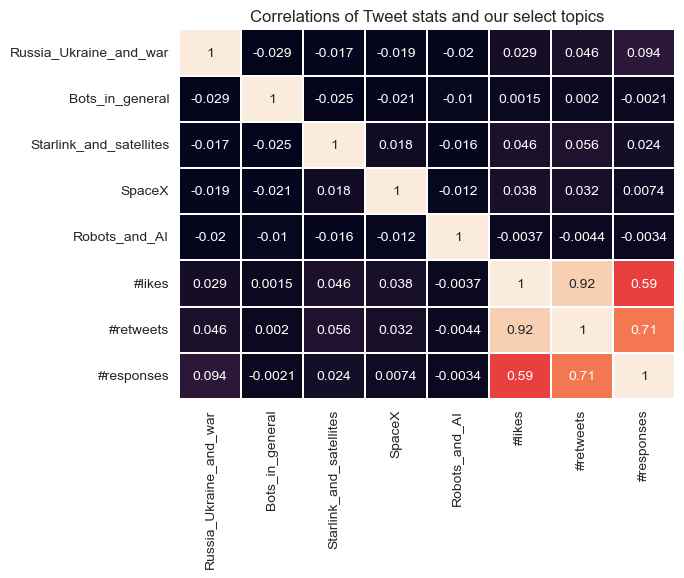

In [173]:
from sklearn.preprocessing import StandardScaler


cols = ['Russia_Ukraine_and_war', 'Bots_in_general', 'Starlink_and_satellites',
       'SpaceX', 'Robots_and_AI', '#likes', '#retweets',
       '#responses']
#scale our values 
ss = StandardScaler()
topic_values_select_ss = pd.DataFrame(ss.fit_transform(topic_values_select[cols]), index=topic_values_select.index, 
                                    columns = cols)

corr_topic_values = topic_values_select_ss.corr()

plt.title('Correlations of Tweet stats and our select topics')
sns.heatmap(corr_topic_values, linewidths=0.05, cbar=False, annot=True);

Interestingly enough, there appear to be no significant correlations between tweet stats and the topics, at least not when using the topic probability as a proxy for topic strength. It's important to note that this may not be revealing the full picture - this data has a lot more of the noise contained within it than the subselection where we've taken those tweets that the topic model has categorised as primarily belonging to these categories (n=855). Let's v quickly subset by the index in our other dataset, and let's do it purely for Musk's tweets. 


In [179]:
topic_values_select.head()

,Russia_Ukraine_and_war,Bots_in_general,Starlink_and_satellites,SpaceX,Robots_and_AI,datetime,Pred_sentiment_out,Pred_sentiment_score,By_or_at_Musk,#likes,#retweets,#responses
tweet_id,,,,,,,,,,,,
1580168615357140992,8.298923e-307,7.616580e-307,4.680169e-307,5.407762e-307,7.246213e-307,2022-10-12 12:08:50+00:00,NEGATIVE,0.999048,Mentions @elonmusk,1.0,0.0,0.0
1580013582778974208,1.166869e-02,9.759405e-03,5.367448e-03,5.956865e-03,8.973969e-03,2022-10-12 01:52:48+00:00,NEGATIVE,0.981824,Mentions @elonmusk,6.0,0.0,1.0
1579994233699565568,1.081946e-02,1.073696e-02,4.491499e-03,4.869585e-03,6.662433e-03,2022-10-12 00:35:54+00:00,POSITIVE,0.870220,Mentions @elonmusk,8.0,0.0,1.0
1579976175732281344,1.168058e-02,9.382016e-03,5.746364e-03,6.351354e-03,8.304516e-03,2022-10-11 23:24:09+00:00,NEGATIVE,0.991798,Mentions @elonmusk,21.0,0.0,4.0
1579963541414903815,2.430777e-02,1.972092e-02,8.698562e-03,9.409069e-03,1.550277e-02,2022-10-11 22:33:57+00:00,NEGATIVE,0.999307,Mentions @elonmusk,1.0,0.0,0.0


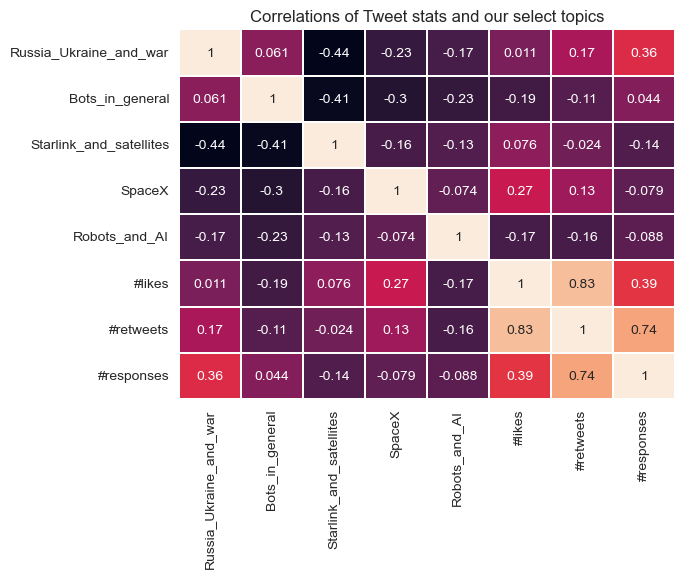

In [180]:
cols = ['Russia_Ukraine_and_war', 'Bots_in_general', 'Starlink_and_satellites',
       'SpaceX', 'Robots_and_AI', '#likes', '#retweets',
       '#responses']

#subset by index values
elon_ = topics_and_sentiment.loc[topics_and_sentiment.By_or_at_Musk=='By @elonmusk']
topic_values_select_main = elon_[['Main_topic']].join(topic_values_select, how='left')

#scale our values 
ss = StandardScaler()
topic_values_select_ss = pd.DataFrame(ss.fit_transform(topic_values_select_main[cols]), index=topic_values_select_main.index, 
                                    columns = cols)

corr_topic_values = topic_values_select_ss.corr()

plt.title('Correlations of Tweet stats and our select topics')
sns.heatmap(corr_topic_values, linewidths=0.05, cbar=False, annot=True);

Now, looking purely at this slice of the data, removing muh of the noise, we can see an interesting pattern emerge, where the responses variable has some correlation with Musk's tweets on Russia, Ukraine and the war. Of course, we should still check it for statistical significance. 
We'll be doing another two statistical tests, so setting alpha to alpha/3 (Bonferroni correction):

| H0: there is no statistically significant correlation between our determined* cluster of Elon Musk's tweets on the Russia-Ukraine war and the number of responses to his tweets. 

| H1: there is a statistically significant correlation between our determined* Elon Musk's tweets on the Russia-Ukraine war and the number of responses to his tweets. 

Setting alpha = 0.017

*I'm referring to them as determined by us because these tweets were categorised via a semi-supervised method, and they are not a gold-standard dataset that has been hand-labelled. 

In [184]:
alpha= 0.05/3
print(alpha)
x = topic_values_select_main['#responses'].to_list()
y = topic_values_select_main['Russia_Ukraine_and_war'].to_list()

from scipy.stats import pearsonr
print(pearsonr(x, y))

0.016666666666666666
PearsonRResult(statistic=0.35800817938096485, pvalue=0.012475760347241698)


So far, from our subset of the data, we've been able to refute this particular Null Hypothesis. There does appear to be a significant, moderate correlation. 

<a id=conc ><a/> 

## 6. Conclusions and model comparison table
    
[LINK to table of contents](#contents)